### Importing Libraries

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smi
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')

### Data Preprocesing

In [88]:
df = pd.read_csv(r'C:/Users/PC/Desktop/ML/Data/synthetic_financial_data.csv')
df.head(5)

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [4]:
df.describe()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1051.272300,2050.486600,4958.381617,0.506800,44.047500
std,2886.89568,28.864062,28.877801,2899.699675,0.499979,15.321707
min,1.00000,1001.000000,2001.000000,10.610000,0.000000,18.000000
25%,2500.75000,1026.000000,2025.000000,2438.175000,0.000000,31.000000
50%,5000.50000,1052.000000,2050.000000,4943.945000,1.000000,44.000000
75%,7500.25000,1076.000000,2076.000000,7499.312500,1.000000,57.000000
max,10000.00000,1100.000000,2100.000000,9999.750000,1.000000,70.000000


In [5]:
df.mean()

transaction_id    5000.500000
customer_id       1051.272300
merchant_id       2050.486600
amount            4958.381617
is_fraudulent        0.506800
customer_age        44.047500
dtype: float64

In [6]:
df.skew()

transaction_id    0.000000
customer_id      -0.031483
merchant_id       0.011545
amount            0.017848
is_fraudulent    -0.027207
customer_age     -0.003143
dtype: float64

In [7]:
df.isnull().sum()

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64

In [8]:
df.columns

Index(['transaction_id', 'customer_id', 'merchant_id', 'amount',
       'transaction_time', 'is_fraudulent', 'card_type', 'location',
       'purchase_category', 'customer_age', 'transaction_description'],
      dtype='object')

In [9]:
df.shape

(10000, 11)

### Exploratory Data Analysis

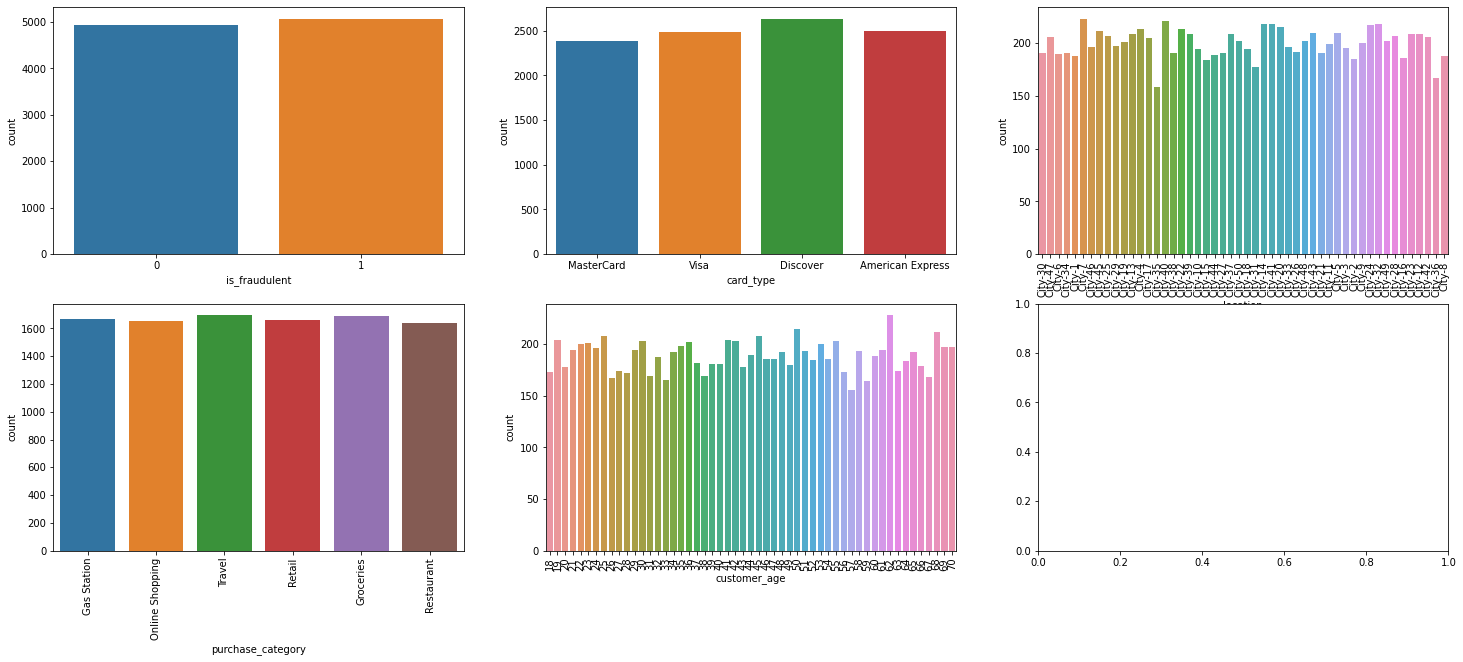

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

sns.countplot(data = df, x ='is_fraudulent', ax=ax[0,0])
sns.countplot(data = df, x ='card_type', ax=ax[0,1])
sns.countplot(data = df, x ='location', ax=ax[0,2])
sns.countplot(data = df, x ='purchase_category', ax=ax[1,0])
sns.countplot(data = df, x ='customer_age', ax=ax[1,1])

ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90)
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=90)
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90)

plt.show()  

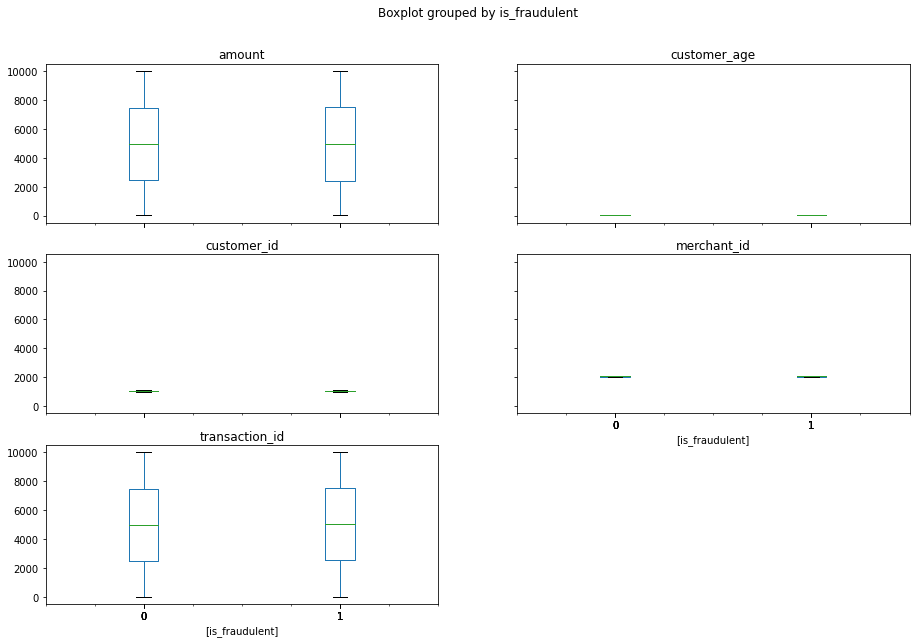

In [44]:
df.boxplot(figsize=(15, 10), grid = False, by = 'is_fraudulent')
plt.show()

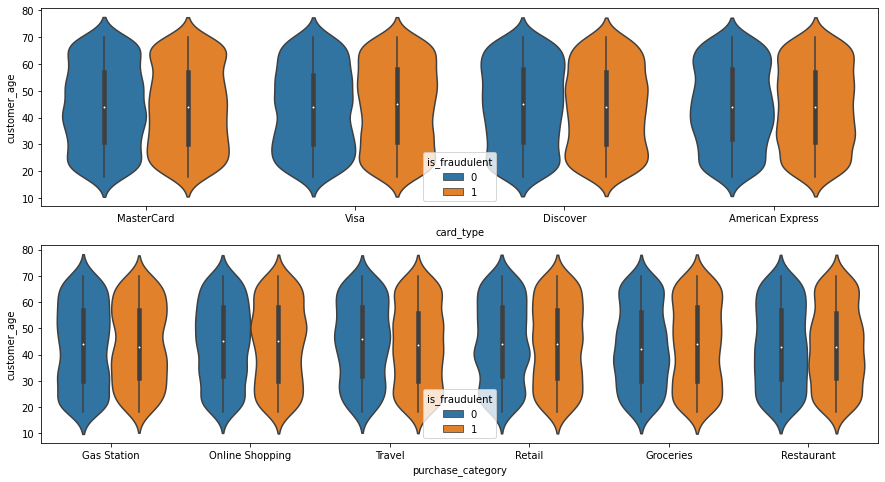

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8))

sns.violinplot(data = df, x ='card_type', y='customer_age', hue = 'is_fraudulent',ax=ax[0])
sns.violinplot(data = df, x ='purchase_category', y='customer_age', hue = 'is_fraudulent',ax=ax[1])

plt.show()

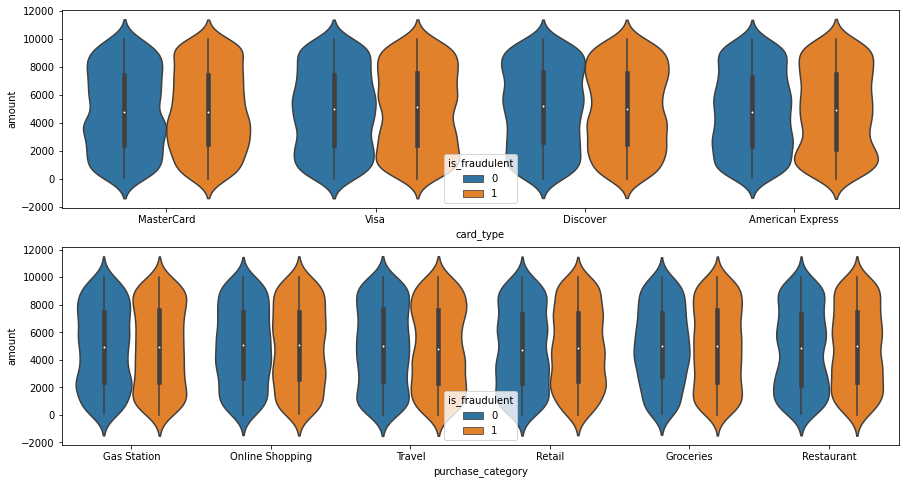

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8))

sns.violinplot(data = df, x ='card_type', y='amount', hue = 'is_fraudulent',ax=ax[0])
sns.violinplot(data = df, x ='purchase_category', y='amount', hue = 'is_fraudulent',ax=ax[1])

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

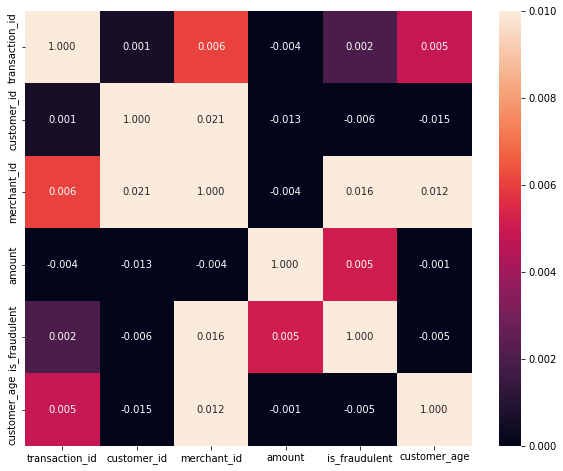

In [47]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, fmt = '.3f', vmin=0, vmax=0.01)
plt.show

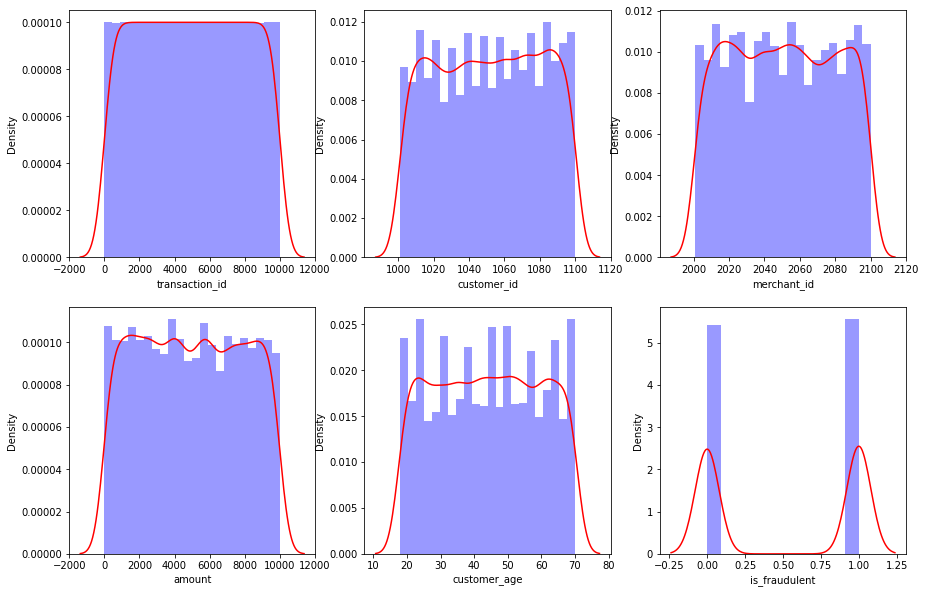

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.distplot(df['transaction_id'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['customer_id'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['merchant_id'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['amount'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['customer_age'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['is_fraudulent'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'blue'})

plt.show()

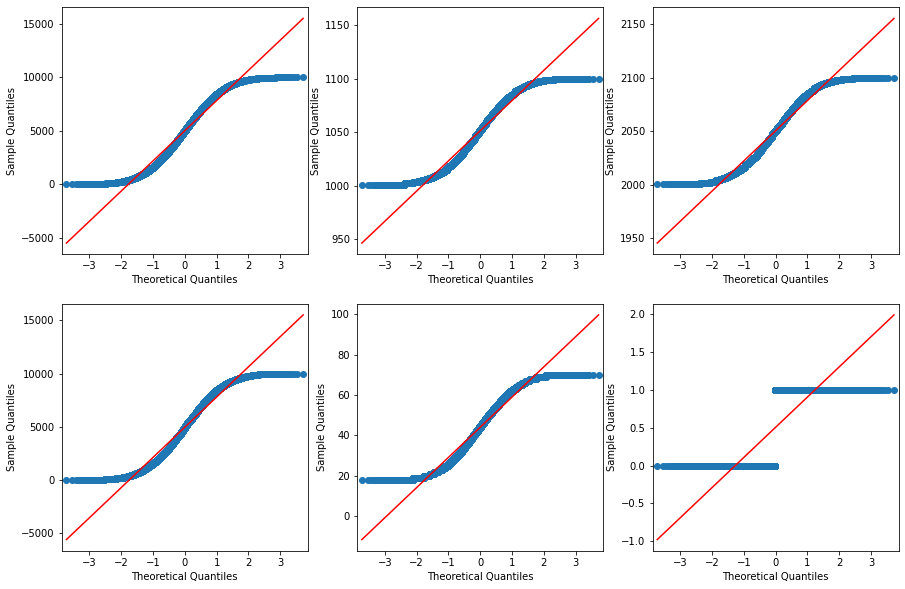

In [48]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

smi.qqplot(df['transaction_id'],ax=ax[0,0], line = 'r')
smi.qqplot(df['customer_id'],ax=ax[0,1],  line = 'r')
smi.qqplot(df['merchant_id'],ax=ax[0,2],  line = 'r')
smi.qqplot(df['amount'],ax=ax[1,0],  line = 'r')
smi.qqplot(df['customer_age'],ax=ax[1,1],  line = 'r')
smi.qqplot(df['is_fraudulent'],ax=ax[1,2],  line = 'r')

plt.show()

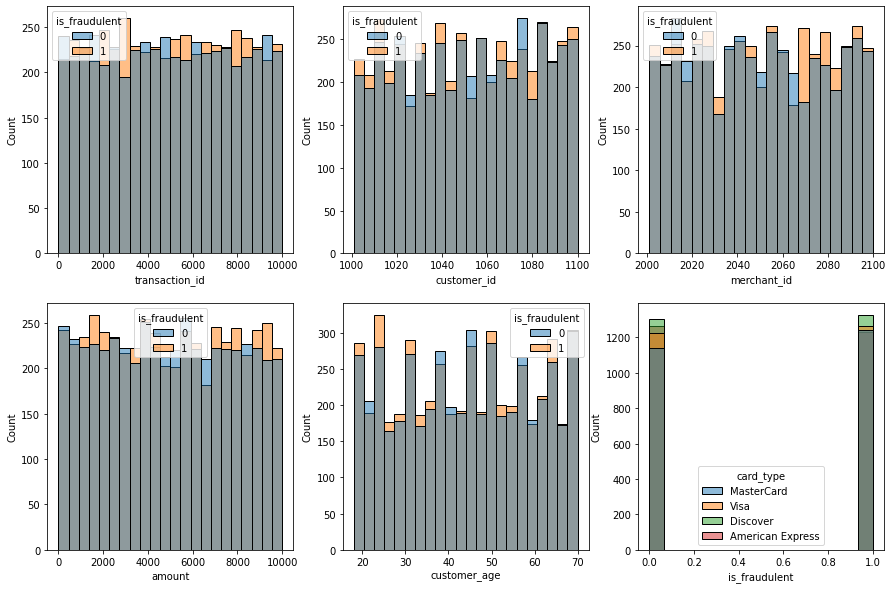

In [39]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(data = df, x = 'transaction_id',ax=ax[0,0], hue ='is_fraudulent')
sns.histplot(data = df, x ='customer_id',ax=ax[0,1], hue ='is_fraudulent' )
sns.histplot(data = df, x ='merchant_id',ax=ax[0,2], hue ='is_fraudulent' )
sns.histplot(data = df, x ='amount',ax=ax[1,0], hue ='is_fraudulent' )
sns.histplot(data = df, x ='customer_age',ax=ax[1,1], hue ='is_fraudulent' )
sns.histplot(data = df, x ='is_fraudulent',ax=ax[1,2], hue ='card_type' )

plt.show()

### Encoder

In [89]:
lb = LabelEncoder()
df['card_type'] = lb.fit_transform(df['card_type'])
df['location'] = lb.fit_transform(df['location'])
df['purchase_category'] = lb.fit_transform(df['purchase_category'])
df.head(1)

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,2,23,0,43,Purchase at Merchant-2027


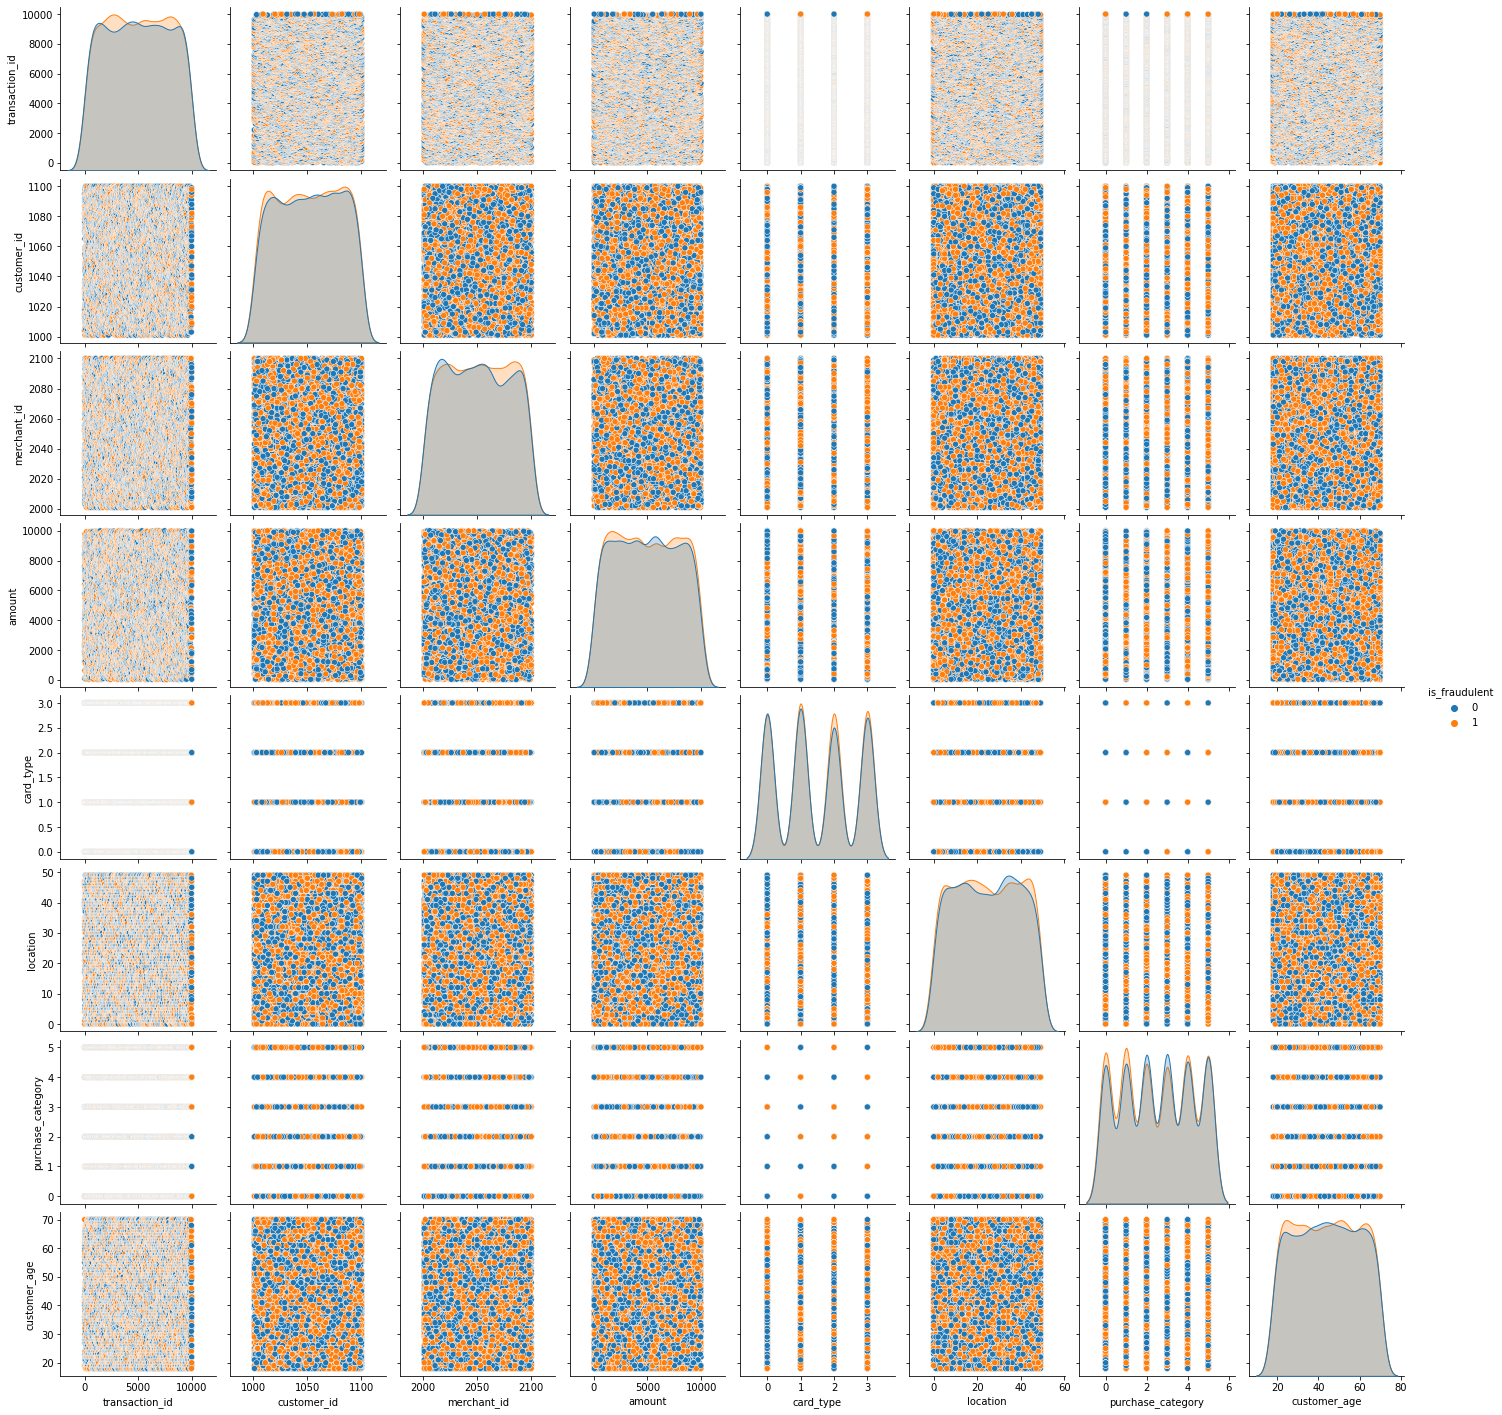

In [53]:
sns.pairplot(df, hue ='is_fraudulent')
plt.show()

In [90]:
df.drop(['transaction_id', 'customer_id', 'merchant_id', 'transaction_time', 'transaction_description'], axis=1)

,amount,is_fraudulent,card_type,location,purchase_category,customer_age
0,5758.59,0,2,23,0,43
1,1901.56,1,3,41,2,61
2,1248.86,1,2,46,0,57
3,7619.05,1,1,46,5,59
4,1890.10,1,2,27,4,36
...,...,...,...,...,...,...
9995,8935.28,1,2,32,3,36
9996,30.15,0,2,25,4,42
9997,6333.64,0,0,0,2,36
9998,2837.13,1,3,2,4,57


In [91]:
X_M = df.drop(['transaction_id', 'customer_id', 'merchant_id', 'transaction_time', 'transaction_description', 'is_fraudulent'], axis = 1)
Y_M = df['is_fraudulent']
scaler = StandardScaler()
x = scaler.fit_transform(X_M) 

### Train Test Split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.2, random_state=42)

### PCA

In [93]:
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Logistic Regression

In [94]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_pca, y_train)
logistic_model.score(X_train_pca, y_train)
model_pred_L = logistic_model.predict(X_test_pca)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.49      0.23      0.32       966
           1       0.52      0.77      0.62      1034

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.47      2000
weighted avg       0.50      0.51      0.47      2000

accuracy:  0.511
mean_absolute_error:  0.489
mean_squared_error:  0.489


### Random Forest Classifier

In [95]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_pca, y_train)
random_forest_model.score(X_train_pca, y_train)
model_pred_R = random_forest_model.predict(X_test_pca)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51       966
           1       0.52      0.48      0.50      1034

    accuracy                           0.50      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.50      0.50      2000

accuracy:  0.5045
mean_absolute_error:  0.4955
mean_squared_error:  0.4955


### Decision Tree

In [96]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_pca, y_train)
decision_tree_model.score(X_train_pca, y_train)
model_pred_T = decision_tree_model.predict(X_test_pca)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52       966
           1       0.54      0.51      0.53      1034

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.52      2000
weighted avg       0.53      0.53      0.53      2000

accuracy:  0.525
mean_absolute_error:  0.475
mean_squared_error:  0.475


### SVC

In [101]:
model_SVC = SVC(kernel = 'linear' ,random_state = 42)
model_SVC.fit(X_train_pca, y_train)
model_SVC.score(X_train_pca, y_train)
model_SVC_Pred = model_SVC.predict(X_test_pca)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       966
           1       0.52      1.00      0.68      1034

    accuracy                           0.52      2000
   macro avg       0.26      0.50      0.34      2000
weighted avg       0.27      0.52      0.35      2000

accuracy:  0.517
mean_absolute_error:  0.483
mean_squared_error:  0.483


### KNeighbors Classifier

In [98]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train_pca, y_train)
model_NEG.score(X_train_pca, y_train)
model_NEG_Pred = model_NEG.predict(X_test_pca)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50       966
           1       0.52      0.50      0.51      1034

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

accuracy:  0.5055
mean_absolute_error:  0.4945
mean_squared_error:  0.4945


1    1034
0     966
Name: is_fraudulent, dtype: int64


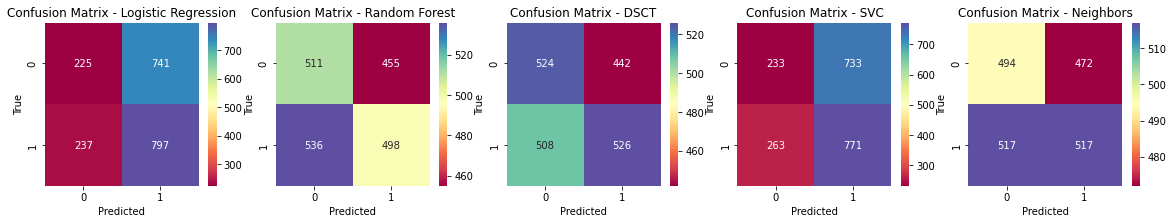

In [99]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Spectral', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Spectral', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Spectral', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Spectral', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Spectral', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

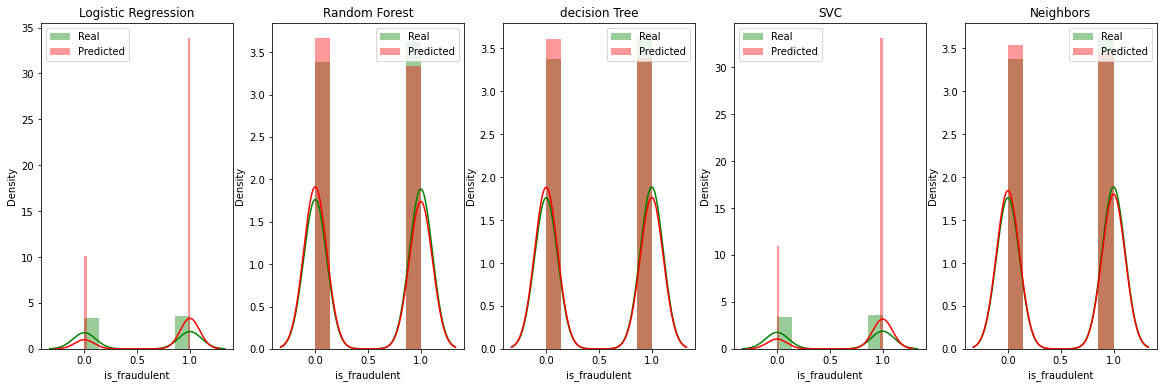

In [100]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()